In [1]:
# 01 - Spontaneuons firing
# This protocol tests the Spontaneuons generation of the action potentials
import matplotlib.pyplot as plt
from neuron import h
from Golgi2020_morpho_1 import Golgi_morpho_1
import multiprocessing
import numpy as np
import sys

In [2]:
#Instantiation of the cell template
subtype = "morpho_1"
cell = Golgi_morpho_1(subtype)
#fixed time step only
Fixed_step = h.CVode()
Fixed_step.active(0)


5394 lines read


False

In [3]:
#this code discover the number of cores available in a CPU and activate the multisplit to use them all.
cpu = multiprocessing.cpu_count() // 2
h.load_file("parcom.hoc")
p = h.ParallelComputeTool()
p.change_nthread(cpu,1)
p.multisplit(1)

4


Text(0, 0.5, 'membrane voltage (mv) ')

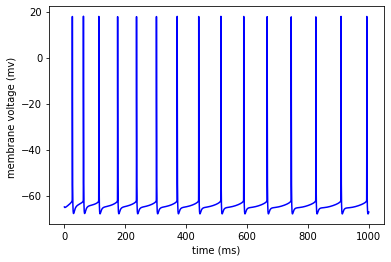

In [4]:
#Basic properties of the simulation. dt, temperature, sim duration and initial voltage
h.dt = 0.025
h.celsius = 32
h.tstop = 1000
h.v_init = -65

#Initialization 
def initialize():
    h.finitialize()
    h.run()

initialize()

#Save the results into an image
fig, ax = plt.subplots()
ax.plot(np.array(cell.time_vector), np.array(cell.vm), 'b', label='spikes')

plt.xlabel("time (ms)")
plt.ylabel("membrane voltage (mv) ")